## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [109]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2020-11-15 11:44:51--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2020-11-15 11:44:52--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6dfb0ccd7631c4622f1128da3a.dl.dropboxusercontent.com/cd/0/inline/BDOWXWypZXhC_0lVZXiTa3--elWV_-TMAkDZ6WuYcHOMBheA-nPS3C29A9MdCSKo_UntqCl51c8uwA0au-t8-P134dfmcALlWSe7omhFwIO7Cfv1NDfc64FMtTHJDTNj1pE/file# [following]
--2020-11-15 11:44:53--  https://uc6dfb0ccd7631c4622f1128da3a.dl.dropboxusercontent.com/cd/0/inline/BDOWXWypZXhC_0lVZXiTa3--elWV_-TMAkDZ6WuYcHO

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [110]:
import pandas as pd
import random 
import numpy as np

# count number of records
# ! wc -l < ~/data/data_000637.txt

file_name = "~/data/data_000637.txt"

N = random.randint(10000, 1310721) 
data = pd.read_csv(file_name, nrows = N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
925644,1,0,48,3869208540,2,8
925645,1,1,2,3869208540,180,12
925646,1,0,123,3869208540,192,6
925647,1,0,48,3869208540,193,12


2\. Find out the number of BX in a ORBIT (the value 'x')

In [111]:
N_BX = data['BX_COUNTER'].max() + 1
N_BX

3564

3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [112]:
times = np.array(data['ORBIT_CNT']*N_BX*25e-9 + data['BX_COUNTER']*25e-9 + data['TDC_MEAS']*25e-9/30)
total_time = times[data.index[-1]] - times[0]
print(f"Estimated total time: {total_time} seconds")

Estimated total time: 0.7459831557935104 seconds


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [113]:
data['ABSOLUTE_TIME'] = times
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,344745.734939
1,1,0,124,3869200167,2374,27,344745.734939
2,1,0,63,3869200167,2553,28,344745.734944
3,1,0,64,3869200167,2558,19,344745.734944
4,1,0,64,3869200167,2760,25,344745.734949
...,...,...,...,...,...,...,...
925644,1,0,48,3869208540,2,8,344746.480914
925645,1,1,2,3869208540,180,12,344746.480919
925646,1,0,123,3869208540,192,6,344746.480919
925647,1,0,48,3869208540,193,12,344746.480919


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [114]:
data['HEAD'] = np.random.randint(0, 2, len(data))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,0,0,123,3869200167,2374,26,344745.734939
1,0,0,124,3869200167,2374,27,344745.734939
2,0,0,63,3869200167,2553,28,344745.734944
3,1,0,64,3869200167,2558,19,344745.734944
4,1,0,64,3869200167,2760,25,344745.734949
...,...,...,...,...,...,...,...
925644,1,0,48,3869208540,2,8,344746.480914
925645,0,1,2,3869208540,180,12,344746.480919
925646,1,0,123,3869208540,192,6,344746.480919
925647,0,0,48,3869208540,193,12,344746.480919


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [115]:
df = data[data['HEAD'] == 1]
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
3,1,0,64,3869200167,2558,19,344745.734944
4,1,0,64,3869200167,2760,25,344745.734949
5,1,0,63,3869200167,2762,4,344745.734949
6,1,0,61,3869200167,2772,14,344745.734949
7,1,0,139,3869200167,2776,0,344745.734949
...,...,...,...,...,...,...,...
925641,1,0,60,3869208539,3233,24,344746.480906
925642,1,0,50,3869208539,3560,21,344746.480914
925644,1,0,48,3869208540,2,8,344746.480914
925646,1,0,123,3869208540,192,6,344746.480919


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

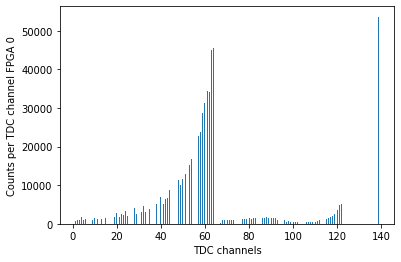

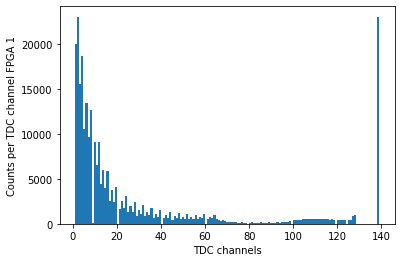

In [116]:
import matplotlib.pyplot as plt

for i in range(2):
    tdc = data[data['FPGA'] == i]['TDC_CHANNEL']
    plt.figure()
    plt.hist(tdc, bins='auto')
    plt.xlabel(f"TDC channels")
    plt.ylabel(f"Counts per TDC channel FPGA {i}")

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [117]:
data.groupby('TDC_CHANNEL').count()['FPGA'].nlargest(3)

TDC_CHANNEL
139    76554
64     46511
63     45672
Name: FPGA, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [121]:
unique_orbits = np.unique(data['ORBIT_CNT'])
print(f"There are {len(unique_orbits)} unique orbits")

unique_orbits = np.unique(data[data['TDC_CHANNEL'] == 139]['ORBIT_CNT'])
print(f"There are {len(unique_orbits)} unique orbits with at least one measurement from TDC_CHANNEL=139")

There are 8370 unique orbits
There are 8344 unique orbits with at least one measurement from TDC_CHANNEL=139
